In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from glob import iglob
from math import log, floor
import os
import re
import pickle

%reload_ext autoreload
%autoreload 2

from plot_utils import *

## Scatter Plot of Maximum Concurrent Flow

In [2]:
from scatter_plot.plot_scatter_plot import scatter
from mcf_cdfs.plot_mcf_cdfs import get_ratio_dataframes

In [3]:
def pop_random_scatter(path_form_csv, pop_csv, query_str, title):
    ratio_dfs = get_ratio_dataframes(path_form_csv, pop_csv)
    plot_dfs = [df.query(query_str) if query_str is not None else df
                for df in ratio_dfs[0:2]]
    scatter(plot_dfs,
            ["KDL", "Non-KDL"],
            ["nc", "smore", "pf"],
            "speedup_ratio",
            "flow_ratio",
            xlim=None,
            ylim=None,
            figsize=(7.5, 4),
            xlabel='Speedup ratio (to original)',
            ylabel='Min. fractional flow\nratio (to original)',
            bbta=(0, 0, 1, 2.35),
            ncol=2,
            xlog=True,
            save=True)

In [4]:
path_form_csv = 'max_concurrent_flow/path-form-mcf-slice_0.csv'
pop_csv = 'max_concurrent_flow/pop-mcf-slice_0.csv'

        problem            tm_model  traffic_seed  scale_factor  flow_ratio  \
0   Kdl.graphml             gravity    1947258216           1.0    1.000000   
1   Kdl.graphml             gravity    1640115421           2.0    1.000000   
2   Kdl.graphml             gravity     102333321           4.0    1.000000   
3   Kdl.graphml             gravity    1876254433           8.0    1.000000   
4   Kdl.graphml             gravity    1710674203          16.0    0.976811   
5   Kdl.graphml             gravity     133885275          32.0    0.965524   
6   Kdl.graphml             gravity    1022240448          64.0    0.982774   
7   Kdl.graphml             gravity    1034240991         128.0    0.973235   
8   Kdl.graphml  poisson-high-intra    1158533055           1.0    1.000000   
9   Kdl.graphml  poisson-high-intra    1771706265          64.0    0.876343   
10  Kdl.graphml  poisson-high-intra    1303852474         128.0    0.853139   

    speedup_ratio  
0       23.278258  
1       30.

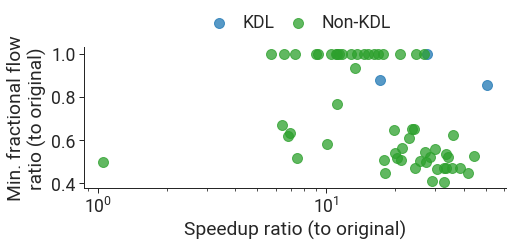

In [5]:
pop_random_scatter(path_form_csv, pop_csv,
                   "tm_model == 'poisson-high-intra'", "Poisson, High Intra")

        problem            tm_model  traffic_seed  scale_factor  flow_ratio  \
0   Kdl.graphml             gravity    1947258216           1.0    1.000000   
1   Kdl.graphml             gravity    1640115421           2.0    1.000000   
2   Kdl.graphml             gravity     102333321           4.0    1.000000   
3   Kdl.graphml             gravity    1876254433           8.0    1.000000   
4   Kdl.graphml             gravity    1710674203          16.0    0.976811   
5   Kdl.graphml             gravity     133885275          32.0    0.965524   
6   Kdl.graphml             gravity    1022240448          64.0    0.982774   
7   Kdl.graphml             gravity    1034240991         128.0    0.973235   
8   Kdl.graphml  poisson-high-intra    1158533055           1.0    1.000000   
9   Kdl.graphml  poisson-high-intra    1771706265          64.0    0.876343   
10  Kdl.graphml  poisson-high-intra    1303852474         128.0    0.853139   

    speedup_ratio  
0       23.278258  
1       30.

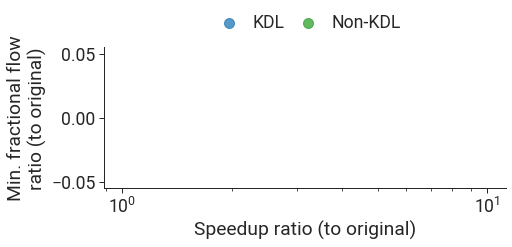

In [6]:
pop_random_scatter(path_form_csv, pop_csv,
                   "tm_model == 'poisson-high-inter'", "Poisson, High Inter")

        problem            tm_model  traffic_seed  scale_factor  flow_ratio  \
0   Kdl.graphml             gravity    1947258216           1.0    1.000000   
1   Kdl.graphml             gravity    1640115421           2.0    1.000000   
2   Kdl.graphml             gravity     102333321           4.0    1.000000   
3   Kdl.graphml             gravity    1876254433           8.0    1.000000   
4   Kdl.graphml             gravity    1710674203          16.0    0.976811   
5   Kdl.graphml             gravity     133885275          32.0    0.965524   
6   Kdl.graphml             gravity    1022240448          64.0    0.982774   
7   Kdl.graphml             gravity    1034240991         128.0    0.973235   
8   Kdl.graphml  poisson-high-intra    1158533055           1.0    1.000000   
9   Kdl.graphml  poisson-high-intra    1771706265          64.0    0.876343   
10  Kdl.graphml  poisson-high-intra    1303852474         128.0    0.853139   

    speedup_ratio  
0       23.278258  
1       30.

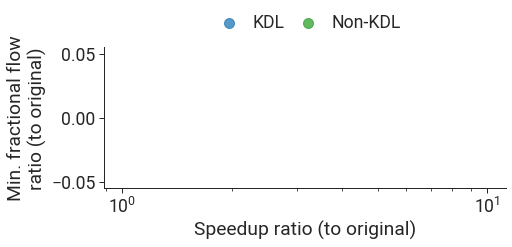

In [7]:
pop_random_scatter(path_form_csv, pop_csv,
                   "tm_model == 'uniform'", "Uniform")

        problem            tm_model  traffic_seed  scale_factor  flow_ratio  \
0   Kdl.graphml             gravity    1947258216           1.0    1.000000   
1   Kdl.graphml             gravity    1640115421           2.0    1.000000   
2   Kdl.graphml             gravity     102333321           4.0    1.000000   
3   Kdl.graphml             gravity    1876254433           8.0    1.000000   
4   Kdl.graphml             gravity    1710674203          16.0    0.976811   
5   Kdl.graphml             gravity     133885275          32.0    0.965524   
6   Kdl.graphml             gravity    1022240448          64.0    0.982774   
7   Kdl.graphml             gravity    1034240991         128.0    0.973235   
8   Kdl.graphml  poisson-high-intra    1158533055           1.0    1.000000   
9   Kdl.graphml  poisson-high-intra    1771706265          64.0    0.876343   
10  Kdl.graphml  poisson-high-intra    1303852474         128.0    0.853139   

    speedup_ratio  
0       23.278258  
1       30.

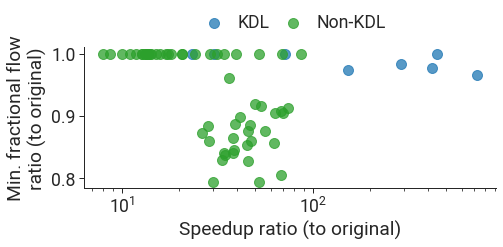

In [8]:
pop_random_scatter(path_form_csv, pop_csv,
                   "tm_model == 'gravity'", "Gravity")

        problem            tm_model  traffic_seed  scale_factor  flow_ratio  \
0   Kdl.graphml             gravity    1947258216           1.0    1.000000   
1   Kdl.graphml             gravity    1640115421           2.0    1.000000   
2   Kdl.graphml             gravity     102333321           4.0    1.000000   
3   Kdl.graphml             gravity    1876254433           8.0    1.000000   
4   Kdl.graphml             gravity    1710674203          16.0    0.976811   
5   Kdl.graphml             gravity     133885275          32.0    0.965524   
6   Kdl.graphml             gravity    1022240448          64.0    0.982774   
7   Kdl.graphml             gravity    1034240991         128.0    0.973235   
8   Kdl.graphml  poisson-high-intra    1158533055           1.0    1.000000   
9   Kdl.graphml  poisson-high-intra    1771706265          64.0    0.876343   
10  Kdl.graphml  poisson-high-intra    1303852474         128.0    0.853139   

    speedup_ratio  
0       23.278258  
1       30.

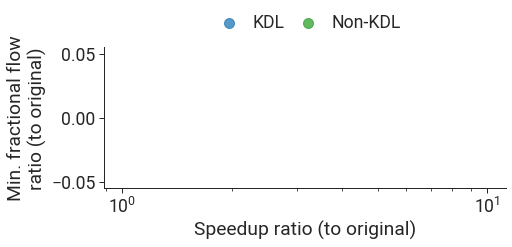

In [9]:
pop_random_scatter(path_form_csv, pop_csv,
                   "tm_model == 'bimodal'", "Bimodal")

        problem            tm_model  traffic_seed  scale_factor  flow_ratio  \
0   Kdl.graphml             gravity    1947258216           1.0    1.000000   
1   Kdl.graphml             gravity    1640115421           2.0    1.000000   
2   Kdl.graphml             gravity     102333321           4.0    1.000000   
3   Kdl.graphml             gravity    1876254433           8.0    1.000000   
4   Kdl.graphml             gravity    1710674203          16.0    0.976811   
5   Kdl.graphml             gravity     133885275          32.0    0.965524   
6   Kdl.graphml             gravity    1022240448          64.0    0.982774   
7   Kdl.graphml             gravity    1034240991         128.0    0.973235   
8   Kdl.graphml  poisson-high-intra    1158533055           1.0    1.000000   
9   Kdl.graphml  poisson-high-intra    1771706265          64.0    0.876343   
10  Kdl.graphml  poisson-high-intra    1303852474         128.0    0.853139   

    speedup_ratio  
0       23.278258  
1       30.

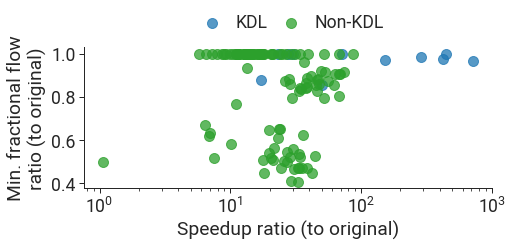

In [10]:
pop_random_scatter(path_form_csv, pop_csv,
                   None, "all")